In [10]:
from colordescriptor import ColorDescriptor
import glob
import os
import cv2
from tqdm.auto import tqdm

In [5]:
# Manually specify the paths here
dataset_path = "data/train"  # Path to the directory that contains the images
index_path = "data/index.csv"  # Path to where the computed index will be stored

In [6]:
cd = ColorDescriptor((32, 32, 3))

In [12]:
features_list = []
features_string_list = []

In [11]:
files = os.listdir(dataset_path)
len(files)

9997

In [14]:
# use glob to grab the image paths and loop over them
for file in tqdm(range(len(files))):
    # extract the image ID (i.e. the unique filename) from the image
    # path and load the image itself
    # imageID = imagePath[imagePath.rfind("/") + 1:]
    image = cv2.imread(os.path.join(dataset_path, files[file]))
    
    # describe the image
    features = cd.describe(image)
    features_list.append(features)
    
    # write the features to file
    # features_string_list.append([str(f) for f in features])

  0%|          | 0/9997 [00:00<?, ?it/s]

In [15]:
len(features_list)

9997

In [16]:
import numpy as np

np.savez("data/train_image_features.npz", image_names=files, features=features_list)


In [38]:
from colordescriptor import ColorDescriptor
from searcher import Searcher
import cv2
import matplotlib.pyplot as plt
# construct the argument parser and parse the arguments

In [28]:
test_path = 'data/test'

In [29]:
files = os.listdir(test_path)

In [30]:
files[0]

'13965759_18009770_300.jpg'

In [47]:
index = np.random.randint(0, len(files))
index

In [48]:
# Hard-coded values (developer can change these directly)
index_path = "data/train_image_features.npz"  # Path to the precomputed index
query_image_path = os.path.join(test_path, files[index]) # Path to the query image
result_path = "data/results"  # Path to store/display results

In [49]:
cd = ColorDescriptor((32, 32, 3))

# load the query image using cv2
query = cv2.imread(query_image_path)
query_rgb = cv2.cvtColor(query, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

In [50]:
# describe the query image
features = cd.describe(query)

# perform the search
searcher = Searcher(index_path)
results = searcher.search(features)

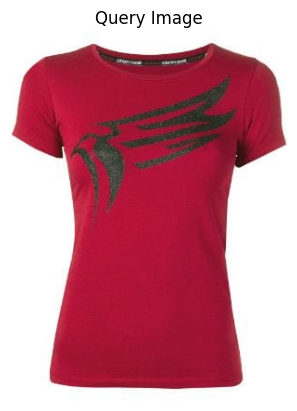

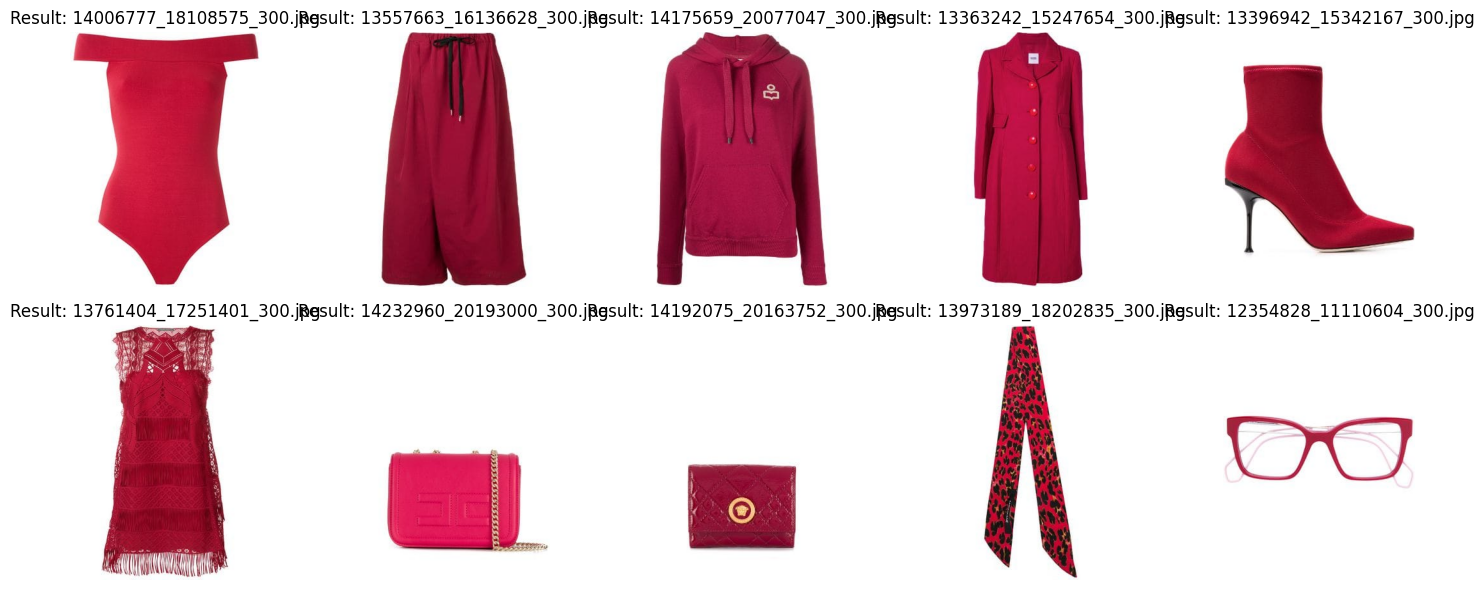

In [51]:
# Display the query image using Matplotlib (OpenCV -> RGB)
plt.imshow(query_rgb)
plt.title("Query Image")
plt.axis('off')  # Hide axis
plt.show()


limit = 10
# Calculate the number of rows and columns needed based on the limit
num_results = len(results) if limit is None else min(len(results), limit)
cols = 5  # You can adjust the number of columns as needed
rows = (num_results // cols) + (1 if num_results % cols != 0 else 0)

# Create a subplot with appropriate size for displaying images
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop over the results and display them in the subplots
for i, (score, resultID) in enumerate(results[:num_results]):
    result_image_path = f"{dataset_path}/{resultID}"
    
    # Read the result image and convert from BGR to RGB
    result = cv2.imread(result_image_path)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    # Display the result image
    axes[i].imshow(result_rgb)
    axes[i].set_title(f"Result: {resultID}")
    axes[i].axis('off')  # Hide axis for each image

# Turn off the axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## More biased towards colour contour